In [6]:
!pip install pyspark

from pyspark.sql import SparkSession
#spark.stop()
spark = SparkSession \
.builder \
.config("spark.executor.instances", "1")\
.config('spark.driver.memory','1g')\
.config('spark.executor.memory', '1g') \
.getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df = spark.read.csv('/content/gdrive/MyDrive/musicrecom/melodice/user_listenings.csv', inferSchema=True, header=True, nullValue='NA', nanValue='NA',emptyValue='NA').dropna()

In [11]:
from pyspark.sql.functions import mean

df.select(mean("sum_listenings")).show()


+-------------------+
|avg(sum_listenings)|
+-------------------+
| 18.772989163614163|
+-------------------+



In [12]:
df.filter(df.sum_listenings < 5).count()

1318633

In [13]:
!pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd

In [15]:
from pyspark.sql.functions import max
df.select(max("sum_listenings")).show()

+-------------------+
|max(sum_listenings)|
+-------------------+
|              35555|
+-------------------+



In [16]:
pandas_df = df.toPandas()


array([[<Axes: title={'center': 'sum_listenings'}>]], dtype=object)

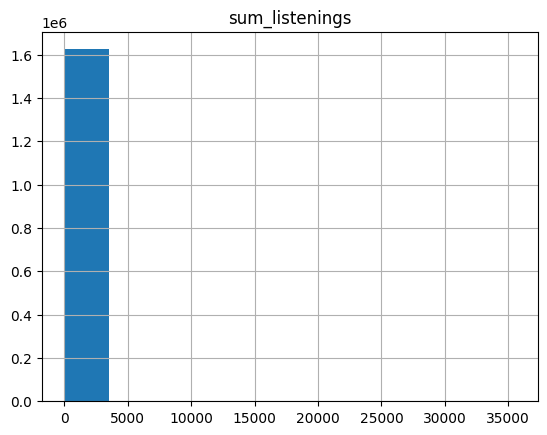

In [27]:
pandas_df.hist(column = "sum_listenings")

<Axes: >

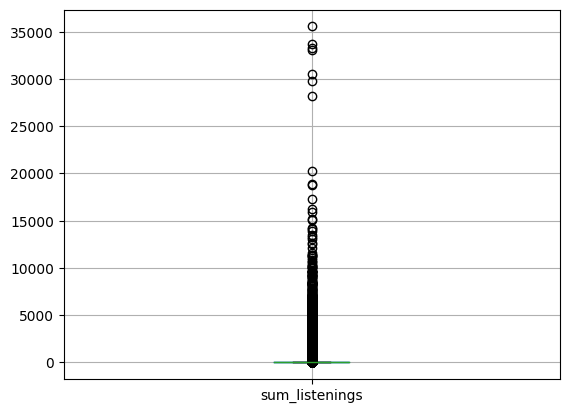

In [18]:
pandas_df.boxplot(column = "sum_listenings")

In [19]:
quantiles = df.approxQuantile("sum_listenings", [0.25, 0.5, 0.75], 0)
quantiles

[1.0, 1.0, 1.0]

In [20]:
df.count()

1624896

In [21]:
df.filter(df.sum_listenings == 1).count()

1267996

In [22]:
from pyspark.sql.functions import col

df.orderBy(col("sum_listenings").desc()).show()

+---------------+--------------+
|       cookieid|sum_listenings|
+---------------+--------------+
|1511705238-9725|         35555|
|1567184344-9791|         33727|
|1560097191-8551|         33214|
|1588865965-3504|         33043|
|1505470833-2428|         30545|
|1488556185-6393|         29815|
|1547737587-5050|         28168|
|1521552628-6413|         20263|
|1570734372-6298|         18855|
|1617690747-6497|         18735|
|1545704083-2368|         17248|
|1526609489-9692|         16217|
|1530371954-4195|         15906|
|1497174717-1985|         15191|
|1519567304-4818|         15068|
|1516452479-4718|         14227|
|1534041435-6766|         14060|
|1587416365-2582|         13890|
|1576170598-5730|         13527|
|1598097616-9798|         13268|
+---------------+--------------+
only showing top 20 rows



In [23]:
user_with_more_listenings = df.filter(df.sum_listenings != 1)
user_with_more_listenings.write.option("header",True).csv("/content/gdrive/MyDrive/musicrecom/melodice/user_with_more_listenings.csv")